## パーセプトロンの実装


#### ANDゲート

まず、ANDゲートを実装してみます。
一度復習しておきましょう。ANDゲートの真理値表です。

|$$x_1$$|$$x_2$$|$$y$$|
|:-|:-|:-|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

In [28]:
def AND(x1,x2):
    w1 = 100
    w2 = 100
    theta = 200
    tmp = x1 * w1 + x2 * w2
    if(tmp < theta):
        return 0
    else:
        return 1

In [30]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


ANDゲートが実装できていることが確認できます。

#### ANDゲート

次に、ORゲートを実装してみます。
これも復習しておきましょう。ORゲートの真理値表です。

|$$x_1$$|$$x_2$$|$$y$$|
|:-|:-|:-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [31]:
def OR(x1,x2):
    w1 = 100
    w2 = 100
    theta = 100
    tmp = x1 * w1 + x2 * w2
    if(tmp < theta):
        return 0
    else:
        return 1

In [32]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


これも大丈夫そうです。

#### バイアスを使ったANDゲート

先程実装したANDゲートを、バイアスを含めた形で実装してみます。

先程の閾値をバイアスに書き換えた式を下に示します・
$$
    \begin{align}
         if \quad b+w_1x_1 + w_2x_2 \leqq 0 \\
         return\quad0 \\
         if \quad b+w_1x_1 + w_2x_2 > 0 \\
         return\quad1 \\
    \end{align}
$$


In [40]:
import numpy as np

def bAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([100,100])
    b = -199
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

In [41]:
print(bAND(0,0))
print(bAND(0,1))
print(bAND(1,0))
print(bAND(1,1))

0
0
0
1


バイアスを直感的な数式で表すとこのようになります。

$$
    \begin{align}
         -199 + 0 + 0 = -199 \quad\leqq 0 \\
         -199 + 0 + 100 = -99 \quad\leqq 0 \\
         -199 + 100 + 0 = -99 \quad\leqq 0 \\
         -199 + 100 + 100 = 1 \quad>0 \\
    \end{align}
$$

ANDゲートは真になりにくい演算子です。
バイアスが閾値を超えることを防いでいることが分かります。

#### バイアスを使ったORゲート

ORゲートをバイアスを含めた形で実装してみます。

In [48]:
import numpy as np

def bOR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([100,100])
    b = -99
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

In [49]:
print(bOR(0,0))
print(bOR(0,1))
print(bOR(1,0))
print(bOR(1,1))

0
1
1
1


同様に式にすると

$$
    \begin{align}
         -99 + 0 + 0 = -99 \quad\leqq\quad0 \\
         -99 + 0 + 100 = 1 \quad>\quad  0 \\
         -99 + 100 + 0 = 1\quad>\quad 0 \\
         -99 + 100 + 100 = 101\quad>\quad 0 \\
    \end{align}
$$


#### バイアスを使ったNANDゲート

NANDゲートをバイアスを含めた形で実装してみます。
NANDの真理値表を確認します。

|$$x_1$$|$$x_2$$|$$y$$|
|:-|:-|:-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

In [63]:
import numpy as np

def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-100,-100])
    b = 200
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

In [64]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


同様に式にすると

$$
    \begin{align}
         200 + 0 + 0 = 200 \quad>\quad0 \\
         200 + 0  - 100 = 100 \quad>\quad  0 \\
         200 - 100 + 0 = 100\quad>\quad 0 \\
         200 - 100 - 100 = 0\quad\leqq\quad 0 \\
    \end{align}
$$


#### XORゲート

XORゲートをこれまでに作った関数を組み合わせて実装してみます。
まずXORの真理値表を確認します。

|$$x_1$$|$$x_2$$|$$y$$|
|:-|:-|:-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

排他的とは、ベン図に起こしたとき、2つの区画が交わらない場所のことを指します。
pythonで図を書いてみます。

In [ ]:
#matplotlib_venn をインストールしないと見れません。
#見なくても差し支えないです。

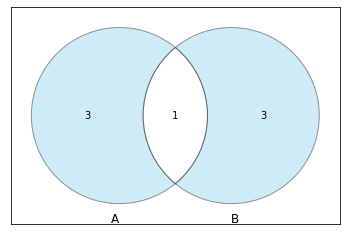

In [62]:
from matplotlib_venn import venn2
from matplotlib import pyplot

# 重なる部分の領域の割合を0にする   
v = venn2(subsets=(3, 3, 1))

# ベン図の色を変更する   
v.get_patch_by_id('10').set_color('skyblue')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')

# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

#参考 https://www.monotalk.xyz/blog/Draw-a-Venn-diagram-with-Python-matplotlib-venn/

In [66]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [69]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(OR(1,1))

0
1
1
1


#### 時間が余ったらする奴
#### 創生学部に向いてるかシミュレータをパーセプトロンで作る

多層パーセプトロンを使って実装します。
まずコードを実行してみて下さい。

In [88]:
#BPL志向
def q1_3(x,y,z):
    x = np.array([x,y,z])
    w = np.array([100,50,20])
    b = -70
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

#コミュ力
def q4_6(x,y,z):
    x = np.array([x,y,z])
    w = np.array([-50,50,50])
    b = 50
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

#広い視点
def q7_9(x,y,z):
    x = np.array([x,y,z])
    w = np.array([0,50,50])
    b = 50
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

#3値のORパーセプトロン
def three_OR(x1,x2,x3):
    x = np.array([x1,x2,x3])
    w = np.array([100,100,100])
    b = -99
    tmp = np.sum(w*x) + b
    if(tmp <= 0):
        return 0
    else:
        return 1

def to_input(a):
    if(a == "y"):
        return 1
    elif(a == "n"):
        return 0

#入力
print("以下の質問にyes(y)かNo(n)で答えて下さい。\n")
print("Q1 純粋な学問よりも、その応用に興味がある y/n") #100
q1_ = input()
q1 = to_input(q1_)
print("Q2 物事の原理を知るよりも、その使い方に目を向けたい y/n") #50
q2_ = input()
q2 = to_input(q2_)
print("Q3 プログラミングが得意だ y/n") #20
q3_ = input()
q3 = to_input(q3_)

print("Q4 人と合わないほうが正直楽だ y/n") #-50
q4_ = input()
q4 = to_input(q4_)
print("Q5 一人で考えるよりも、誰かと一緒に議論したほうが、よりよい結論を得られると思う y/n")#50
q5_ = input()
q5 = to_input(q5_)
print("Q6 人と議論することが好きだ y/n") #50
q6_ = input()
q6 = to_input(q6_)

print("Q7 人から個性的だと言われる　y/n") #0
q7_ = input()
q7 = to_input(q7_)
print("Q8 1つのものを極めるよりも、色々なものに触れてみたいと思う y/n")#50
q8_ = input()
q8 = to_input(q8_)
print("Q9 分野によらず、様々なことを学ぶのが好きだ y/n") #50
q9_ = input()
q9 = to_input(q9_)

print("-----processing----\n")

#統合
sol = q1_3(q1,q2,q3)
com = q4_6(q4,q5,q6)
wid = q7_9(q7,q8,q9)
result = three_OR(sol,com,wid)

if(result == 1):
    print("創生学部に向いています!")
else:
    print("向いていないかも知れません。。。")

以下の質問にyes(y)かNo(n)で答えて下さい。

Q1 純粋な学問よりも、その応用に興味がある y/n
n
Q2 物事の原理を知るよりも、その使い方に目を向けたい y/n
n
Q3 プログラミングが得意だ y/n
n
Q4 人と合わないほうが正直楽だ y/n
y
Q5 一人で考えるよりも、誰かと一緒に議論したほうが、よりよい結論を得られると思う y/n
n
Q6 人と議論することが好きだ y/n
n
Q7 人から個性的だと言われる　y/n
y
Q8 1つのものを極めるよりも、色々なものに触れてみたいと思う y/n
y
Q9 分野によらず、様々なことを学ぶのが好きだ y/n
y
-----processing----

創生学部に向いています!


創生学部での学修において重要な要素を(独断と偏見で)「課題解決志向」、「コミュ力」、「多面的な知識を付ける意欲」と考え、(それこそ私のバイアス入りまくりで)重みを(テキトーに)つけます。<br>
第1層目では、それぞれの能力がの有無を判定するパーセプトロン、<br>
第2層目では、３つの能力のうち２つ以上があると判断される場合、１を出力しています。(だから3値のORを使います。)


このように大きめで複雑な条件分岐もパーセプトロンで実装できます。